In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

Making API Calls

In [3]:
api_key = api_keys.api_key

# Starting URL for Weather Map API Call

url = "http://api.openweathermap.org/data/2.5/weather?"
lat = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
y = []

for x in cities:
    try:
        params = {"appid" : api_key, "q" : x, "units" : "imperial"}
        response = requests.get(url, params= params).json()
        #print(response)
        lat_value = response['coord']['lat']
        temp_value = response['main']['temp']
        humidity_value = response['main']['humidity']
        cloudiness_value = response["clouds"]["all"]
        wind_speed_value = response['wind']['speed']
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response['wind']['speed'])
        y.append(x)
        print(f" For {x} The latitude is {lat_value} Temperature is {temp_value}  Humidity(%) is {humidity_value} Cloudiness(%) is {cloudiness_value} Wind Speed is {wind_speed_value}")
        
    except (KeyError, IndexError):
        print("City not found... skipping.")
        

 For barrow The latitude is -38.31 Temperature is 42.47  Humidity(%) is 69 Cloudiness(%) is 0 Wind Speed is 10.54
 For santa rosa The latitude is -36.62 Temperature is 44.18  Humidity(%) is 40 Cloudiness(%) is 0 Wind Speed is 6.17
 For lasa The latitude is 34.92 Temperature is 74.41  Humidity(%) is 83 Cloudiness(%) is 8 Wind Speed is 6.93
 For isangel The latitude is -19.55 Temperature is 72.35  Humidity(%) is 100 Cloudiness(%) is 56 Wind Speed is 18.48
 For bredasdorp The latitude is -34.53 Temperature is 37.4  Humidity(%) is 93 Cloudiness(%) is 0 Wind Speed is 2.24
 For punta arenas The latitude is -53.16 Temperature is 39.2  Humidity(%) is 64 Cloudiness(%) is 0 Wind Speed is 11.41
 For bay city The latitude is 43.59 Temperature is 68.14  Humidity(%) is 64 Cloudiness(%) is 90 Wind Speed is 4.7
 For banyumas The latitude is -7.52 Temperature is 78.6  Humidity(%) is 85 Cloudiness(%) is 0 Wind Speed is 10.2
 For ancud The latitude is -41.87 Temperature is 43.55  Humidity(%) is 98 Cloudi

Saving the Data sets results into a CSV file

In [16]:
# creating a data frame with the data sets

city_data = pd.DataFrame({"Cities" : y, "Latitude" : lat, "Temperature(Fahrenheit)" : temp, "Humidity": humidity
                         , "Cloudiness" : cloudiness, "Wind Speed(mph)": wind_speed})

# Giving the displayed data cleaner formatting
city_data["Humidity"] = city_data["Humidity"].map("{}%".format)
city_data["Cloudiness"] = city_data["Cloudiness"].map("{}%".format)

# Displaying the data
city_data.head()

,Cities,Latitude,Temperature(Fahrenheit),Humidity,Cloudiness,Wind Speed(mph)
0,barrow,-38.31,42.47,69%,0%,10.54
1,santa rosa,-36.62,44.18,40%,0%,6.17
2,lasa,34.92,74.41,83%,8%,6.93
3,isangel,-19.55,72.35,100%,56%,18.48
4,bredasdorp,-34.53,37.40,93%,0%,2.24


In [17]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"

city_data.to_csv("city_data.csv", encoding="utf-8", index=False)

##The Scatter Plots

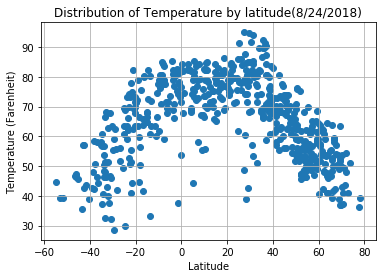

In [21]:
# Build a scatter plot for Temperature vs Latitude of different cities
plt.scatter(lat, temp, marker="o")

# Incorporate the other graph properties
plt.title("Distribution of Temperature by latitude(8/24/2018)")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/TemperatureInWorldCities.png")

# Show plot
plt.show()

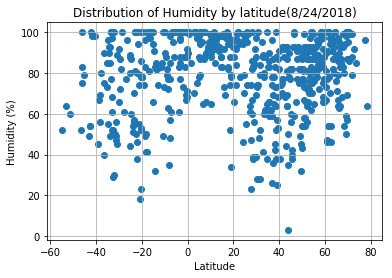

In [22]:
# Build a scatter plot for Humidity Vs Latitude of different cities
plt.scatter(lat, humidity, marker="o")

# Incorporate the other graph properties
plt.title("Distribution of Humidity by latitude(8/24/2018)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/HumidityInWorldCities.png")

# Show plot
plt.show()

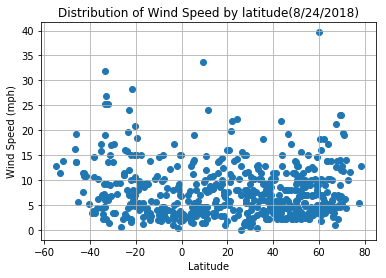

In [23]:
# Build a scatter plot for Wind speed Vs Latitude of different cities
plt.scatter(lat, wind_speed, marker="o")

# Incorporate the other graph properties
plt.title("Distribution of Wind Speed by latitude(8/24/2018)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/WindSpeedInWorldCities.png")

# Show plot
plt.show()

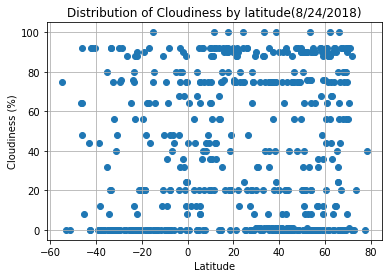

In [24]:
# Build a scatter plot for Cloudiness Vs Latitude of different cities
plt.scatter(lat, cloudiness, marker="o")

# Incorporate the other graph properties
plt.title("Distribution of Cloudiness by latitude(8/24/2018)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/CloudinessInWorldCities.png")

# Show plot
plt.show()